In [1]:
#pip install pandas

In [2]:
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [5]:
timeframe = "1D"

start_date = pd.Timestamp("2015-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

tickers = ["GS","JPM","MS"]

In [6]:
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

df_ticker.head()

GS                                      JPM  \
                             open     high     low   close   volume   open   
time                                                                         
2016-05-12 00:00:00-04:00  160.32  161.470  157.31  158.14  1858471  62.27   
2016-05-13 00:00:00-04:00  157.88  159.715  155.26  155.36  1992753  61.70   
2016-05-16 00:00:00-04:00  155.34  156.900  154.60  155.48  2498648  61.21   
2016-05-17 00:00:00-04:00  154.79  157.110  153.77  154.71  2032183  61.43   
2016-05-18 00:00:00-04:00  154.81  160.000  154.65  159.91  2879240  61.70   

                                                               MS         \
                              high    low  close    volume   open   high   
time                                                                       
2016-05-12 00:00:00-04:00  62.5600  61.37  61.78   9326096  26.56  26.73   
2016-05-13 00:00:00-04:00  62.4001  61.02  61.21  12031632  26.19  26.65   
2016-05-16 00:00:00-04:00  61.9850  61.00  61.67   9164953  25.86  26.42   
2016-05-17 00:00:00-04:00  62.1600  61.15  61.66   9753185  26.08  26.56   
2016-05-18 00:00:00-04:00  64.1700  61.69  64.07  20844276  26.19  27.29   

                                                    
                             low   close    volume  
time                                                
2016-05-12 00:00:00-04:00  25.97  26.235   8958943  
2016-05-13 00:00:00-04:00  25.89  25.900  11789309  
2016-05-16 00:00:00-04:00  25.85  26.210   8565442  
2016-05-17 00:00:00-04:00  25.95  26.160  11237083  
2016-05-18 00:00:00-04:00  26.18  27.240  17887594

In [7]:
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

MC_even_dist.portfolio_data.head()

GS                                    \
                             open     high     low   close   volume   
time                                                                  
2016-05-12 00:00:00-04:00  160.32  161.470  157.31  158.14  1858471   
2016-05-13 00:00:00-04:00  157.88  159.715  155.26  155.36  1992753   
2016-05-16 00:00:00-04:00  155.34  156.900  154.60  155.48  2498648   
2016-05-17 00:00:00-04:00  154.79  157.110  153.77  154.71  2032183   
2016-05-18 00:00:00-04:00  154.81  160.000  154.65  159.91  2879240   

                                          JPM                         \
                          daily_return   open     high    low  close   
time                                                                   
2016-05-12 00:00:00-04:00          NaN  62.27  62.5600  61.37  61.78   
2016-05-13 00:00:00-04:00    -0.017579  61.70  62.4001  61.02  61.21   
2016-05-16 00:00:00-04:00     0.000772  61.21  61.9850  61.00  61.67   
2016-05-17 00:00:00-04:00    -0.004952  61.43  62.1600  61.15  61.66   
2016-05-18 00:00:00-04:00     0.033611  61.70  64.1700  61.69  64.07   

                                                     MS                        \
                             volume daily_return   open   high    low   close   
time                                                                            
2016-05-12 00:00:00-04:00   9326096          NaN  26.56  26.73  25.97  26.235   
2016-05-13 00:00:00-04:00  12031632    -0.009226  26.19  26.65  25.89  25.900   
2016-05-16 00:00:00-04:00   9164953     0.007515  25.86  26.42  25.85  26.210   
2016-05-17 00:00:00-04:00   9753185    -0.000162  26.08  26.56  25.95  26.160   
2016-05-18 00:00:00-04:00  20844276     0.039085  26.19  27.29  26.18  27.240   

                                                  
                             volume daily_return  
time                                              
2016-05-12 00:00:00-04:00   8958943          NaN  
2016-05-13 00:00:00-04:00  11789309    -0.012769  
2016-05-16 00:00:00-04:00   8565442     0.011969  
2016-05-17 00:00:00-04:00  11237083    -0.001908  
2016-05-18 00:00:00-04:00  17887594     0.041284

In [8]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001561,1.014385,1.007152,1.008745,1.001358,0.998401,0.976474,0.991194,0.994217,1.026340,...,1.015907,1.001544,1.008798,0.984883,0.999043,1.009268,1.002509,0.996060,0.995010,1.012472
2,1.008809,1.010123,1.002437,1.010949,0.979521,1.011271,0.989413,0.998421,0.968032,1.014509,...,1.020289,1.012473,1.011330,0.996651,1.006279,1.034773,1.002737,0.987928,0.986609,1.007541
3,1.008869,1.006770,0.992955,1.002760,0.987062,1.011826,0.992753,1.007623,0.984477,1.004037,...,1.010079,1.004889,1.009884,0.987504,1.005816,1.027754,0.988796,0.989322,0.978855,1.024198
4,1.013737,1.034835,0.983573,1.004366,0.983869,1.002838,0.984218,1.004914,0.975463,1.022204,...,1.012162,1.012407,1.024145,0.980099,1.015379,1.043272,0.988983,0.987226,0.988506,1.017201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.974914,0.952719,1.111755,1.862261,2.220031,1.335911,1.181836,1.982576,2.913444,2.465066,...,0.947581,0.912143,0.778655,0.994877,1.364594,1.716904,3.689641,1.884600,1.091333,1.164044
1257,0.985019,0.955307,1.095678,1.840609,2.203802,1.345375,1.174518,1.986706,2.947907,2.454391,...,0.922675,0.894322,0.785595,1.001382,1.356833,1.677880,3.768850,1.864607,1.087532,1.169360
1258,0.989413,0.942012,1.110183,1.855614,2.153154,1.336828,1.175861,1.984724,2.926007,2.457257,...,0.934929,0.895417,0.782911,0.999492,1.369154,1.693196,3.755983,1.857673,1.080118,1.188092
1259,0.979032,0.920828,1.105737,1.849881,2.131896,1.334071,1.166533,2.019279,2.984502,2.489710,...,0.933684,0.904066,0.790516,1.018179,1.366360,1.663491,3.689892,1.895072,1.081230,1.204744


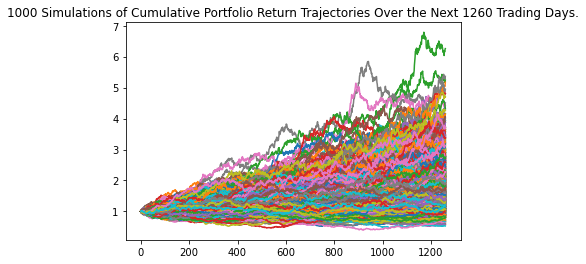

In [9]:
#Simulated projections of 1000 different scenarios over the next 5 years

line_plot = MC_even_dist.plot_simulation()

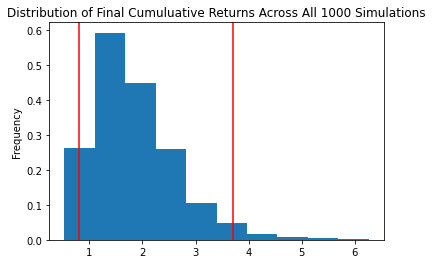

In [10]:
dist_plot = MC_even_dist.plot_distribution()

In [11]:
even_tbl = MC_even_dist.summarize_cumulative_return()
print(even_tbl)

count           1000.000000
mean               1.853040
std                0.781440
min                0.530132
25%                1.284622
50%                1.691361
75%                2.257107
max                6.259952
95% CI Lower       0.813000
95% CI Upper       3.699262
Name: 1260, dtype: float64


In [12]:
even_ci_lower = round(even_tbl[8]*15000,2)
even_ci_upper = round(even_tbl[9]*15000,2)

print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $12195.0 and $55488.92.
